In [55]:
from matplotlib import pyplot as plt
import numpy as np

###Function Calling

In [91]:
def kmeans(data,k):
  # Step 2: Center Selection
  n = data.shape[0]
  centers = data[np.random.choice(n,k,replace=False)]
  temp_closest = np.zeros(n,dtype=int)
  clusters = [[] for _ in range(k)]  # Initializing clusters
  iteration = 0

  while True:
    # Step 3: Distance all centers from sample and assign that point to cluster where distance is min
    distance = np.zeros((n,k))
    for i in range(k):
      distance[:,i] = ((data - centers[i])**2).sum(axis=1)**5

    closest = np.argmin(distance,axis=1)
    # closest = list of index

    # Step 4: Finding New Centers
    for i in range(k):
      centers[i] = data[closest==i].mean(axis=0)

    iteration+=1

    if iteration>1:
      shifts = np.sum(closest!=temp_closest)
      if shifts < 10:
        for i in range(k):
          clusters[i] = data[closest==i].tolist()
        return clusters, centers

    temp_closest = closest.copy()

    if iteration > 10:
      return clusters, centers

###Main Code

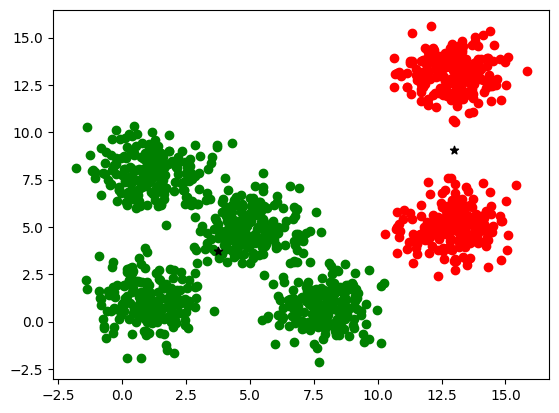

In [118]:
# Loading data
data = np.genfromtxt('/content/data.csv', delimiter=',')
k = 2
clusters, centers = kmeans(data, k)

# Plotting
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i])
    plt.scatter(centers[i, 0], centers[i, 1], c='k', marker='*')

plt.show()